# Part 1: Time Series Data Summarization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tslearn.piecewise import SymbolicAggregateApproximation

### Interface to facilitate calculation of Euclidean distance, RMSE and statistics

In [2]:
# An interface to calculate euclidean distance between 2 signals
def euc_dist(x,y):
    return float(np.linalg.norm(x - y))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x,y):
    return sqrt(mean_squared_error(x, y))

def summarize_data(x):
    print("Average:", np.mean(x).round(4), " Mean:", np.median(x).round(4), " Max:", np.max(x).round(4), " Min:", np.min(x).round(4), "\n")

### Load 50k time_series (synthetic and seismic)

In [3]:
import struct
filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

filename_seismic = 'seismic_size50k_len256_znorm.bin'
with open(filename_seismic, 'rb') as in_file:
    time_series_seismic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

# Compression with int8

## 50k synthetic time_series (int8)

In [4]:
# Following code is to compress and reconstruct synthetic data

x = time_series_synthetic

sax_128 = SymbolicAggregateApproximation(n_segments=128, alphabet_size_avg=256)
sax_64 = SymbolicAggregateApproximation(n_segments=64, alphabet_size_avg=256)
sax_32 = SymbolicAggregateApproximation(n_segments=32, alphabet_size_avg=256)

sum_128 = sax_128.fit_transform(x)
sum_64 = sax_64.fit_transform(x)
sum_32 = sax_32.fit_transform(x)

rec_128 = sax_128.inverse_transform(sum_128)
rec_64 = sax_64.inverse_transform(sum_64)
rec_32 = sax_32.inverse_transform(sum_32)

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_synthetic_int8 = []
errorList_64_synthetic_int8 = []
errorList_32_synthetic_int8 = []

data_size = 50000
for i in range(data_size):
    x = time_series_synthetic[i,]
    errorList_128_synthetic_int8.append(rmse(x, rec_128[i,]))
    errorList_64_synthetic_int8.append(rmse(x, rec_64[i,]))
    errorList_32_synthetic_int8.append(rmse(x, rec_32[i,]))

## 50k seismic time_series (int8)

In [5]:
# Following code is to compress and reconstruct seismic data

x = time_series_seismic

sax_128 = SymbolicAggregateApproximation(n_segments=128, alphabet_size_avg=256)
sax_64 = SymbolicAggregateApproximation(n_segments=64, alphabet_size_avg=256)
sax_32 = SymbolicAggregateApproximation(n_segments=32, alphabet_size_avg=256)

sum_128 = sax_128.fit_transform(x)
sum_64 = sax_64.fit_transform(x)
sum_32 = sax_32.fit_transform(x)

rec_128 = sax_128.inverse_transform(sum_128)
rec_64 = sax_64.inverse_transform(sum_64)
rec_32 = sax_32.inverse_transform(sum_32)

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_seismic_int8 = []
errorList_64_seismic_int8 = []
errorList_32_seismic_int8 = []

data_size = 50000
for i in range(data_size):
    x = time_series_seismic[i,]
    errorList_128_seismic_int8.append(rmse(x, rec_128[i,]))
    errorList_64_seismic_int8.append(rmse(x, rec_64[i,]))
    errorList_32_seismic_int8.append(rmse(x, rec_32[i,]))

## Error evaluation

In [6]:
# Reconstruction error for 50k synthetic time_series
print("RMSE of 50k synthetic time series: 128 -> 1024 (int8)")
summarize_data(errorList_128_synthetic_int8)
print("RMSE of 50k synthetic time series: 64 -> 1024 (int8)")
summarize_data(errorList_64_synthetic_int8)
print("RMSE of 50k synthetic time series: 32 -> 1024 (int8)")
summarize_data(errorList_32_synthetic_int8)


# Reconstruction error for 50k seismic time_series
print("RMSE of 50k seismic time series: 128 -> 1024 (int8)")
summarize_data(errorList_128_seismic_int8)
print("RMSE of 50k seismic time series: 64 -> 1024 (int8)")
summarize_data(errorList_64_seismic_int8)
print("RMSE of 50k seismic time series: 32 -> 1024 (int8)")
summarize_data(errorList_32_seismic_int8)

RMSE of 50k synthetic time series: 128 -> 1024 (int8)
Average: 0.0962  Mean: 0.091  Max: 0.2867  Min: 0.0227 

RMSE of 50k synthetic time series: 64 -> 1024 (int8)
Average: 0.1509  Mean: 0.1432  Max: 0.4538  Min: 0.0395 

RMSE of 50k synthetic time series: 32 -> 1024 (int8)
Average: 0.2172  Mean: 0.2067  Max: 0.6278  Min: 0.0588 

RMSE of 50k seismic time series: 128 -> 1024 (int8)
Average: 0.7913  Mean: 0.8042  Max: 0.9178  Min: 0.2281 

RMSE of 50k seismic time series: 64 -> 1024 (int8)
Average: 0.9639  Mean: 0.9695  Max: 0.9907  Min: 0.4361 

RMSE of 50k seismic time series: 32 -> 1024 (int8)
Average: 0.9881  Mean: 0.9904  Max: 0.9989  Min: 0.6447 



## Visualize reconstruction errors of 50k time series with Boxplot

In [7]:
plt.rcParams['figure.figsize'] = [12, 6]

<function matplotlib.pyplot.show(*args, **kw)>

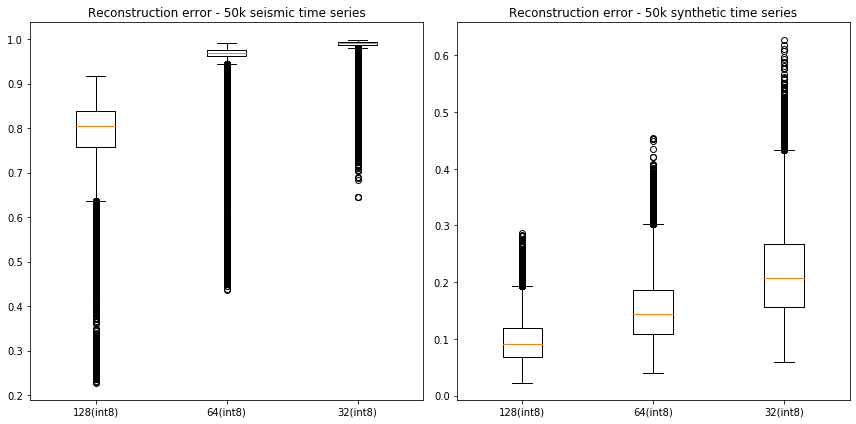

In [8]:
plt.subplot(1,2,1)
plt.boxplot([errorList_128_seismic_int8, errorList_64_seismic_int8, errorList_32_seismic_int8])
plt.title('Reconstruction error - 50k seismic time series')
plt.xticks([1, 2, 3], ['128(int8)', '64(int8)', '32(int8)'])

plt.subplot(1,2,2)
plt.boxplot([errorList_128_synthetic_int8, errorList_64_synthetic_int8, errorList_32_synthetic_int8])
plt.title('Reconstruction error - 50k synthetic time series')
plt.xticks([1, 2, 3], ['128(int8)', '64(int8)', '32(int8)'])

plt.tight_layout()
plt.show

In [9]:
import numpy as np
errorFolder = "./errors/"
errorTag = "_SAX"

np.save(errorFolder + "128_seismic" + errorTag + "_int8", errorList_128_seismic_int8)
np.save(errorFolder + "64_seismic" + errorTag + "_int8", errorList_64_seismic_int8)
np.save(errorFolder + "32_seismic" + errorTag + "_int8", errorList_32_seismic_int8)

np.save(errorFolder + "128_synthetic" + errorTag + "_int8", errorList_128_synthetic_int8)
np.save(errorFolder + "64_synthetic" + errorTag + "_int8", errorList_64_synthetic_int8)
np.save(errorFolder + "32_synthetic" + errorTag + "_int8", errorList_32_synthetic_int8)

In [10]:
# load example
# data = np.load(errorFolder + "128_seismic" + errorTag + "_float32" + ".npy")